* Problem Statement:
The dataset consists of real estate information including transaction date, house age, distance to the nearest MRT (Mass Rapid Transit) station, number of convenience stores nearby, latitude, longitude, and house price per unit area. The goal is to build machine learning models to predict the house price per unit area based on the given features.

In [1]:
#Imported necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#loaded dataset
real_estate = pd.read_csv(r'C:\Users\tejas\Downloads\Real_Estate.csv')
real_estate.head(10)

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710
5,2012-09-06 14:18:34.142030,13.3,279.1726,2,24.994994,121.543823,36.972376
6,2012-09-06 15:07:23.396013,38.5,377.7956,3,25.009895,121.558955,27.637382
7,2012-09-07 07:57:25.291322,15.2,552.4371,5,24.997109,121.544377,44.116585
8,2012-09-07 10:06:48.384148,24.0,617.4424,3,24.987622,121.527841,49.071247
9,2012-09-07 13:21:33.254701,13.0,323.6550,8,24.978663,121.483457,43.114353


1)Transaction date: The date and time of the property transaction.

2)House age: The age of the house in years.

3)Distance to the nearest MRT (Mass Rapid Transit) station: The distance from the house to the nearest MRT station in meters.
4)Number of convenience stores: The number of convenience stores in the vicinity of the house.

5)Latitude: The latitude coordinate of the house location.
6)Longitude: The longitude coordinate of the house location.

7)House price of unit area: The price of the house per unit area.

# Data Exploration

In [10]:
#Displaying few data of the dataset and info about the dataset
print(real_estate.head())
print(real_estate.info())

             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144   
2  2012-09-05 01:10:52.349449        1.1                            1978.6710   
3  2012-09-05 13:26:01.189083       22.2                            1055.0670   
4  2012-09-06 08:29:47.910523        8.5                             967.4000   

   Number of convenience stores   Latitude   Longitude  \
0                             8  25.007059  121.561694   
1                             2  25.012148  121.546990   
2                            10  25.003850  121.528336   
3                             5  24.962887  121.482178   
4                             6  25.011037  121.479946   

   House price of unit area  
0                  6.488673  
1                 24.970725  
2                 26.694267  
3                 38.091638  
4             

The dataset contains 7 columns. Here’s a brief overview of the columns:
1)Transaction date: The date of the real estate transaction.
2)House age: Age of the house in years.
3)Distance to the nearest MRT station: Distance to the nearest Mass Rapid Transit station in meters.
4)Number of convenience stores: Number of convenience stores in the vicinity.
5)Latitude: Latitude of the property location.
6)Longitude: Longitude of the property location.
7)House price of unit area: House price of unit area.

In [13]:
#Descriptive Statistics of Data
descriptive_stats = real_estate.describe()
print(descriptive_stats)

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

# Data Preprocessing

In [11]:
real_estate.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In this dataset there is no null values are present

In [ ]:
#drop unnecessary column
real_estate.drop(columns=['Transaction date'],inplace=True)

In [15]:
# Set the aesthetic style of the plots
sb.set_style("whitegrid")

# EDA

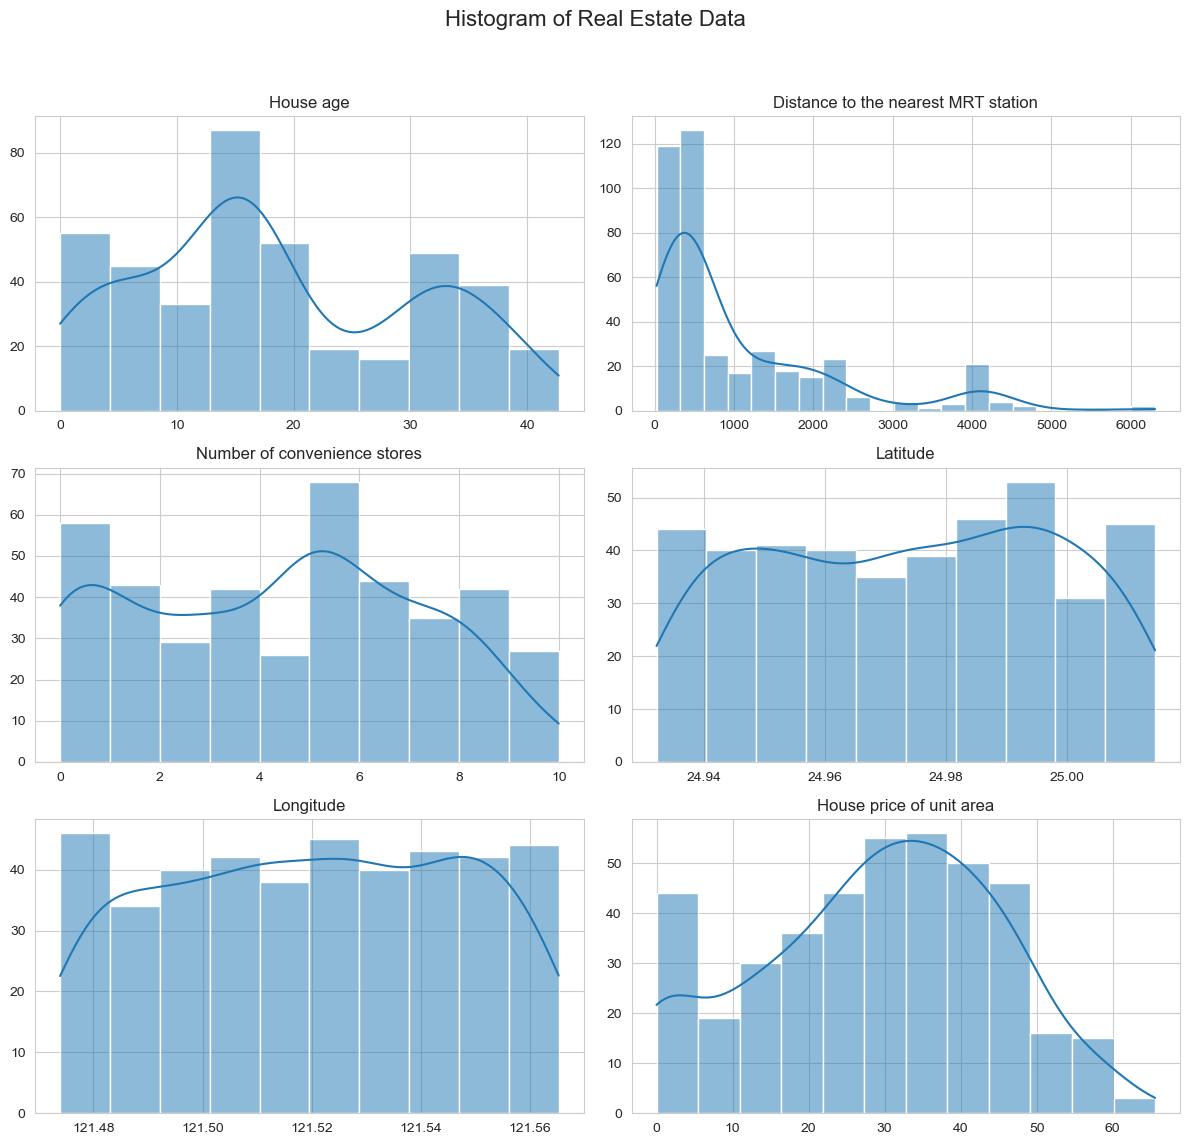

In [21]:
# Create histograms for the numerical columns
fig , ax = plt.subplots(nrows=3 , ncols=2 , figsize = (12,12))
fig.suptitle('Histogram of Real Estate Data' , fontsize = 16)
cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']
for i, col in enumerate(cols):
    sb.histplot(real_estate[col], kde=True, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(col)
    ax[i//2, i%2].set_xlabel('')
    ax[i//2, i%2].set_ylabel('')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() 

The histograms provide insights into the distribution of each variable:

1)House Age: This shows a relatively uniform distribution with a slight increase in the number of newer properties (lower age).

2)Distance to the Nearest MRT Station: Most properties are located close to an MRT station, as indicated by the high frequency of lower distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.

3)Number of Convenience Stores: Displays a wide range, with notable peaks at specific counts, like 0, 5, and 10. It suggests certain common configurations in terms of convenience store availability.

4)Latitude and Longitude: Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited area.

5)House Price of Unit Area: Displays a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase.

* Create scatter plots to explore the relationships between these variables and the house price. It will help us understand which factors might be influencing property prices more significantly:

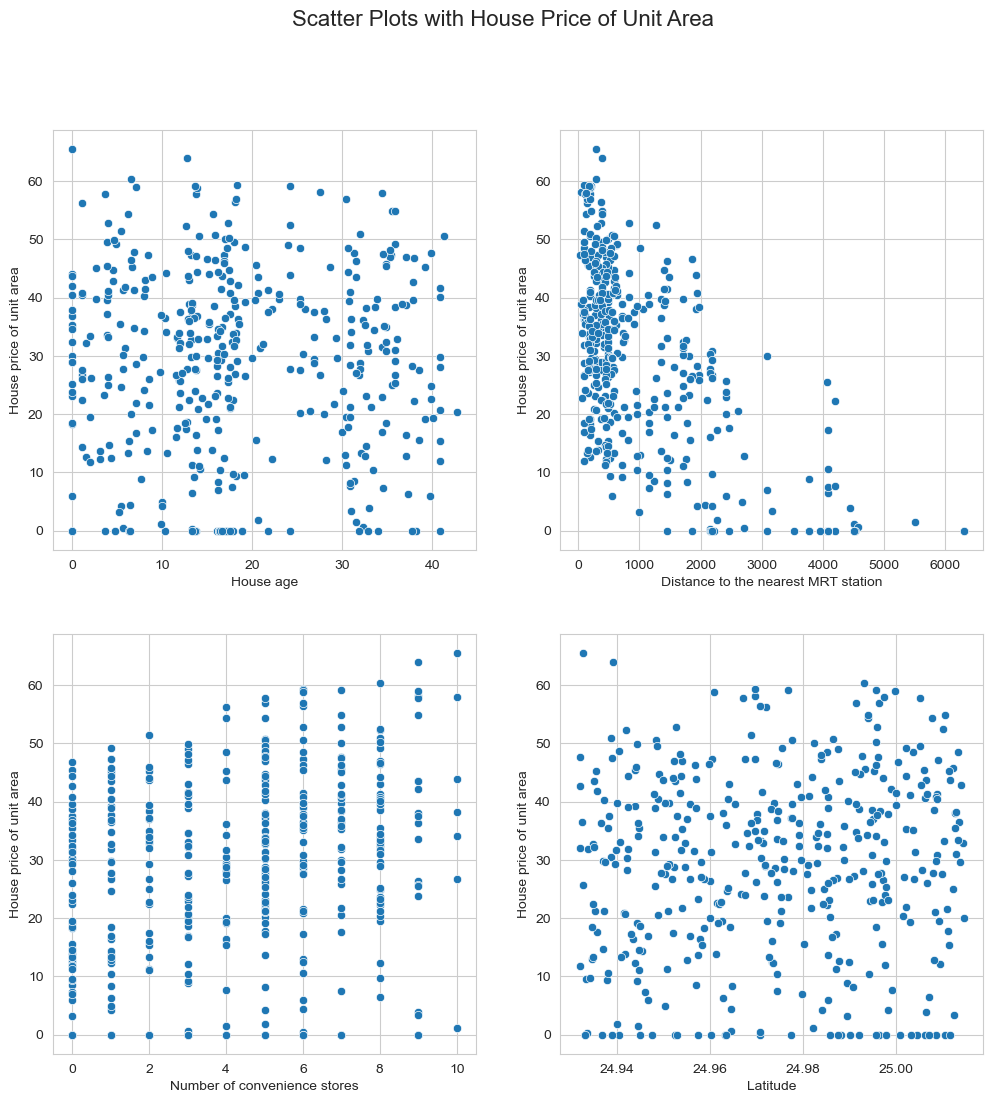

In [34]:
fig , ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sb.scatterplot(data=real_estate , x='House age' , y='House price of unit area' , ax =ax[0,0])
sb.scatterplot(data=real_estate , x='Distance to the nearest MRT station' , y='House price of unit area' , ax =ax[0,1])
sb.scatterplot(data=real_estate , x='Number of convenience stores' , y='House price of unit area' , ax =ax[1,0])
sb.scatterplot(data=real_estate , x='Latitude' , y='House price of unit area' , ax =ax[1,1])
plt.show()


In [28]:
real_estate.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

The scatter plots revealed interesting relationships between various factors and house prices:

1)House Age vs. House Price: There doesn’t seem to be a strong linear relationship between house age and price. However, it appears that very new and very old houses might have higher prices.

2)Distance to the Nearest MRT Station vs. House Price: There is a clear trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease. It suggests a strong negative relationship between these two variables.

3)Number of Convenience Stores vs. House Price: There seems to be a positive relationship between the number of convenience stores and house prices. Houses with more convenience stores in the vicinity tend to have higher prices.

4)Latitude vs. House Price: While not a strong linear relationship, there seems to be a pattern where certain latitudes correspond to higher or lower house prices. It could be indicative of specific neighbourhoods being more desirable.

# Correlation 

In [48]:
correlation_real_estate = real_estate.corr()
correlation_real_estate

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


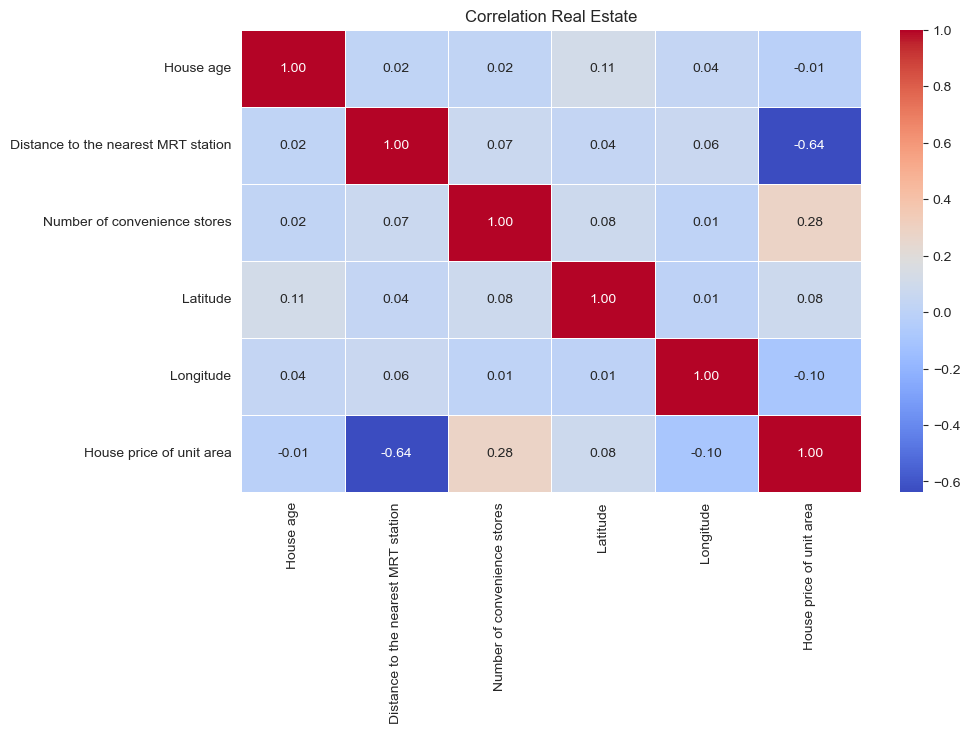

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [51]:
# Plotting the correlation matrix
plt.figure(figsize=(10,6))
sb.heatmap(correlation_real_estate,annot=True,cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Real Estate')
plt.show()
print(correlation_real_estate)

The correlation matrix provides quantified insights into how each variable is related to the others, especially with respect to the house price:

1)House Age: This shows a very weak negative correlation with house price (-0.012), implying that age is not a strong predictor of price in this dataset.

2)Distance to Nearest MRT Station: Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation.

3)Number of Convenience Stores: Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices.

4)Latitude and Longitude: Both show a weak correlation with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099).


Overall, the most significant factors affecting house prices in this dataset appear to be the proximity to MRT stations and the number of convenience stores nearby. The geographical location (latitude and longitude) and the age of the house seem to have less impact on the price.

# Spliting the data

We split the dataset into training and testing sets using train_test_split from scikit learn to facilitate model training and evalution

In [ ]:
#splitting dataset into independet variable and dependent variable
#spliting dataset into train and test data

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X=real_estate.drop('House price of unit area',axis=1)
y=real_estate['House price of unit area']

# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

# Machine Learning Model

* Machine Learning Algorithms:
1) Linear Regression: Fit a linear regression model to the data to establish a linear relationship between the independent variables and the target variable (house price per unit area).
2) Random Forest Regression: Utilize a random forest regression model to capture non-linear relationships and interactions between features, thereby improving prediction accuracy.
3) Support Vector Regression (SVR): Apply SVR to identify the optimal hyperplane that best separates the data points and predicts the house price per unit area.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

 * Model 1 Linear Regression 

In [59]:
LR = LinearRegression()

# Fit the model to the training data
LR.fit(X_train,y_train)

# Make predictions on the testing data
LR_Prediction = LR.predict(X_test)

# Calculate the Mean Squared Error
LR_MSE = mean_squared_error(y_test , LR_Prediction)
print("Linear Regression Mean Squared Error:", LR_MSE)
LR_mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error',LR_mae)
LR_rmse = np.sqrt(LR_MSE)
print("Root Mean Squared Error (RMSE):", LR_rmse)

Linear Regression Mean Squared Error: 124.6090737101526
Mean absolute error 13.806614298340653
Root Mean Squared Error (RMSE): 11.162843441979852


* Model 2 Random Forest 

In [60]:
# Initialize Random Forest Regressor
RF = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
RF.fit(X_train, y_train)

# Predict on the test set
y_pred = RF.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(" Random Forest Regressor Mean Squared Error:", mse)
RF_mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error',RF_mae)
RF_rmse = np.sqrt(RF_mse)
print("Root Mean Squared Error (RMSE):", RF_rmse)

 Random Forest Regressor Mean Squared Error: 133.45783424881392
Mean absolute error 9.859550554001942
Root Mean Squared Error (RMSE): 16.146086713869117


* Model 3 Support Vector Machine

In [61]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Fit the model to the training data
svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svr.predict(X_test)
# Calculate evaluation metrics
svr_mae = mean_absolute_error(y_test, y_pred)
svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("Mean Squared Error (MSE):", svr_mse)
print("SVR Mean Absolute Error (MAE):", svr_mae)
print("Root Mean Squared Error (RMSE):", svr_rmse)

Mean Squared Error (MSE): 260.69611617178083
SVR Mean Absolute Error (MAE): 13.806614298340653
Root Mean Squared Error (RMSE): 16.146086713869117


* Based on evaluation metrics, the Random Forest Regressor seems to be the most accurate model for predicting the house price of unit area. This conclusion is drawn from the fact that the Random Forest Regressor has the lowest Mean Squared Error (MSE) and Mean Absolute Error (MAE), as well as the lowest Root Mean Squared Error (RMSE) compared to the other models.

Therefore, based on these metrics:

1)Linear Regression:
MSE: 124.609
MAE: 13.807
RMSE: 11.163

2)Random Forest Regressor:
MSE: 133.458
MAE: 9.860
RMSE: 16.146

3)Support Vector Regressor:
MSE: 260.696
MAE: 13.807
RMSE: 16.146

We can conclude that the Random Forest Regressor provides the most accurate predictions for the house price of unit area.




